# CREATED BY SOMAN SAJID
                                                                    ##MMA 192 | PRACTICAL MACHINE LEARNING |TASK 02

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
#CODE BOOK FOR GAPMINDER DATA SET IS ATTACHED WITH EMAIL FOR REFERENCE

In [ ]:
# WE WANT TO UNDERSTAND THE RELATION BETWEEN EMPLOYMENT RATE WITH OTHER ECONOMIC AND HEALTH RELATED INDICATORS.

    ##TO BE SPECIFIC, WE ARE TRYING TO BUILD A MODEL WHICH PREDICTS THE IMPACT OF THE FOLLOWING INDEPENDENT VARIABLES ON ...
        ###...DEPENDENT VARIABLE WHICH IS 'EMPLOYMENT RATE':
             ## 1. Breast Cancer Per 100th in 100,000 (Independent Variable)
             ## 2. Income per Person (Independent Variable)
             ## 3. Alcohol Consumption (Independent Variable)
             ## 4. CO2 Emmission (Independent Variable)
             ## 5. Life Expectancy (Independent Variable)
             ## 6. Political Score (Independent Variable)
             ## 7. Electricity Consumption in KWh (Independent Variable)
             ## 8. Urban Rate (Independent Variable)
             ## 9. Internet Usage Rate (Independent Variable)
             ## 10. Suicide Rate per 100th in 100,000 (Independent Variable)
             ## 11. Female Employment Rate (Independent Variable)
             ## 12. Armed Forces Rate in Total Labor Force (%) (Independent Variable)
             ## 13. Oil Per Person Consumption (%) (Independent Variable)
             ## 14. HIV Rate (Independent Variable)
    
 ##This is a Regression Problem as our Dependent Variable is Continous and Hence, classification, won't be a good idea. 
    ##Note: We maybe dropping some variables due to some stastical results and robustness which are discussed below

In [2]:
#LOADING DATASET FOR GAPMINDER 
GM = pd.read_csv("D:/Studies -/MIMBA/1st Year/4th Module/Practical Machine Learning/TASK 02/GM.csv")

#CHECK IF DATA IS LOADED
GM.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
3,Andorra,21943.339900,10.17,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,5.362179,NaN,88.92
4,Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.999954,51.093,NaN,-2.0,172.999227,14.554677,75.699997,56.70


In [3]:
#Checking if there's any Mising observations
    ##Seems like there are plenty of features with missing observations as shown
GM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       190 non-null    float64
 2   alcconsumption        187 non-null    float64
 3   armedforcesrate       164 non-null    float64
 4   breastcancerper100th  173 non-null    float64
 5   co2emissions          200 non-null    float64
 6   femaleemployrate      178 non-null    float64
 7   hivrate               147 non-null    float64
 8   internetuserate       192 non-null    float64
 9   lifeexpectancy        191 non-null    float64
 10  oilperperson          63 non-null     float64
 11  polityscore           161 non-null    float64
 12  relectricperperson    136 non-null    float64
 13  suicideper100th       191 non-null    float64
 14  employrate            178 non-null    float64
 15  urbanrate             2

In [4]:
#We have also uses boolean masks to check if there are any missing data 
GM.isnull()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,True,False,True,True,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
209,False,True,True,False,True,False,False,True,False,False,True,True,True,True,False,False
210,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [5]:
#Checking if there is any list columns with its name which contain missing values
[col for col in GM.columns if GM[col].isnull().any()]

['incomeperperson',
 'alcconsumption',
 'armedforcesrate',
 'breastcancerper100th',
 'co2emissions',
 'femaleemployrate',
 'hivrate',
 'internetuserate',
 'lifeexpectancy',
 'oilperperson',
 'polityscore',
 'relectricperperson',
 'suicideper100th',
 'employrate',
 'urbanrate']

In [6]:
#store number of missing values per column as Series object as GM1
GM1 = GM.isnull().sum()

In [7]:
#filter out and sort columns with missing value
GM1[GM1>=0].sort_values(ascending=False)

oilperperson            150
relectricperperson       77
hivrate                  66
polityscore              52
armedforcesrate          49
breastcancerper100th     40
employrate               35
femaleemployrate         35
alcconsumption           26
incomeperperson          23
suicideper100th          22
lifeexpectancy           22
internetuserate          21
co2emissions             13
urbanrate                10
country                   0
dtype: int64

In [8]:
#the same in percentages
GM1[GM1>0].sort_values(ascending=False) / len(GM) * 100

oilperperson            70.422535
relectricperperson      36.150235
hivrate                 30.985915
polityscore             24.413146
armedforcesrate         23.004695
breastcancerper100th    18.779343
employrate              16.431925
femaleemployrate        16.431925
alcconsumption          12.206573
incomeperperson         10.798122
suicideper100th         10.328638
lifeexpectancy          10.328638
internetuserate          9.859155
co2emissions             6.103286
urbanrate                4.694836
dtype: float64

In [9]:
#descriptive stats for features with Oilperperson non-missing
GM[GM['oilperperson'].notnull()].describe().iloc[:,:16] 

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,61.000000,61.000000,61.000000,61.000000,6.300000e+01,63.000000,56.000000,62.000000,62.000000,63.000000,62.000000,63.000000,61.000000,63.000000,62.00000
mean,13125.703947,8.878525,1.289931,48.293443,1.528548e+10,46.506349,0.572321,51.696039,75.403823,1.484085,5.112903,1736.447277,10.588365,57.833334,69.55871
std,12681.514406,5.445355,1.046546,24.863868,4.435829e+10,10.943843,2.358642,26.218962,5.740807,1.825090,6.818742,2052.673663,6.982873,7.592314,17.28437
min,558.062877,0.050000,0.287892,16.600000,2.262553e+08,17.700001,0.060000,2.199998,52.797000,0.032281,-10.000000,68.115229,1.380965,41.099998,27.14000
25%,2549.558474,5.000000,0.560987,26.400000,1.807744e+09,41.850000,0.100000,33.611747,73.157000,0.532541,4.000000,515.340241,5.213720,52.799999,61.08000
50%,6334.105194,9.720000,0.972378,43.900000,3.503878e+09,47.599998,0.150000,46.333146,75.539000,1.032470,8.500000,969.004339,9.847460,58.500000,70.73000
75%,25306.187190,12.480000,1.649451,73.900000,9.623559e+09,53.850000,0.400000,77.097878,80.521250,1.622737,10.000000,1992.873977,13.239810,62.350000,81.64000
max,39972.352770,19.150000,6.394936,101.100000,3.342210e+11,68.900002,17.800000,93.277508,83.394000,12.228645,10.000000,11154.755030,33.341860,76.000000,100.00000


In [10]:
#descriptive stats for features with Oilperperson when missing
GM[GM['oilperperson'].isnull()].describe().iloc[:,:16] 

##We see no such differences in descriptive statistics hence, we may drop this variable later as 70% of the observations are... 
    #..missing 

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,129.000000,126.000000,103.000000,112.000000,1.370000e+02,115.000000,91.000000,130.000000,129.000000,0.0,99.000000,73.000000,130.000000,115.000000,141.000000
mean,6667.562897,5.629603,1.535271,31.471429,3.187361e+08,48.120870,2.774286,27.971746,67.037876,NaN,2.797980,687.070751,9.196231,59.075652,51.145674
std,14542.835055,4.244715,2.000132,19.064969,1.105012e+09,16.311332,5.080109,25.187980,10.065324,NaN,5.837912,1074.996005,5.929450,11.828427,24.205841
min,103.775857,0.030000,0.000000,3.900000,1.320000e+05,11.300000,0.060000,0.210066,47.794000,NaN,-9.000000,0.000000,0.201449,32.000000,10.400000
25%,495.734247,2.330000,0.355626,19.500000,1.637900e+07,38.049999,0.200000,6.973749,58.199000,NaN,-2.000000,56.372450,4.985935,50.900002,30.840000
50%,1714.942890,4.970000,0.837768,25.950000,6.277700e+07,47.500000,0.900000,19.188715,69.927000,NaN,5.000000,303.805449,7.867749,58.799999,48.580000
75%,5900.616944,8.105000,1.523323,35.350000,2.237473e+08,58.150000,2.700000,44.742716,75.057000,NaN,8.000000,823.823197,11.974608,66.399998,68.120000
max,105147.437700,23.010000,10.638521,92.000000,1.089703e+10,83.300003,25.900000,95.638113,81.804000,NaN,10.000000,7314.355637,35.752872,83.199997,100.000000


In [11]:
#descriptive stats for features with Electricity Per Person non-missing
GM[GM['relectricperperson'].notnull()].describe().iloc[:,:16] 

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,130.000000,131.000000,131.000000,131.000000,1.340000e+02,134.000000,114.000000,131.000000,134.000000,63.000000,128.000000,136.000000,132.000000,134.000000,134.000000
mean,8784.531620,7.265725,1.569822,40.888550,7.498595e+09,46.252239,1.496930,39.910449,71.683866,1.484085,4.093750,1173.178995,9.738163,57.805224,61.622537
std,11420.725637,5.205685,1.782187,23.913941,3.118700e+10,13.440455,3.732962,27.617121,8.538799,1.825090,6.505525,1681.440173,6.258190,9.324535,21.014940
min,103.775857,0.050000,0.000000,3.900000,7.315000e+06,12.400000,0.060000,0.720009,48.397000,0.032281,-10.000000,0.000000,0.201449,37.400002,13.220000
25%,1156.551494,2.855000,0.534049,23.050000,1.847184e+08,39.250001,0.100000,12.700039,68.338750,0.532541,-2.000000,203.652109,4.924459,51.225000,48.000000
50%,3172.679152,6.590000,1.012732,33.000000,7.520022e+08,47.299999,0.300000,38.260234,73.824000,1.032470,7.000000,597.136436,9.169298,58.300001,63.580000
75%,11606.578380,11.055000,1.847337,51.700000,3.463191e+09,53.875001,0.800000,64.038996,78.279500,1.622737,9.250000,1491.145249,12.924765,63.425000,77.180000
max,52301.587180,23.010000,10.638521,101.100000,3.342210e+11,82.199997,24.800000,95.638113,83.394000,12.228645,10.000000,11154.755030,33.341860,80.699997,100.000000


In [12]:
#descriptive stats for features with Electricity Per Person when missing
GM[GM['relectricperperson'].isnull()].describe().iloc[:,:16] 

##We see no such differences in descriptive statistics hence, we may drop this variable as well but since the observations ...
    ##...are enough to make averages(mean) from.

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,60.000000,56.000000,33.000000,42.000000,6.600000e+01,44.000000,33.000000,61.000000,57.000000,0.0,33.000000,0.0,59.000000,44.000000,69.000000
mean,8646.574065,5.341250,0.944606,26.530952,2.788656e+07,51.500000,3.450303,26.446109,65.215526,NaN,2.121212,NaN,9.423097,61.165910,47.344348
std,19143.173610,3.806643,1.285331,13.716244,3.277317e+07,17.336881,5.927774,26.046834,10.805568,NaN,5.313647,NaN,6.441876,13.336938,26.243028
min,115.305996,0.030000,0.105115,6.400000,1.320000e+05,11.300000,0.060000,0.210066,47.794000,NaN,-9.000000,NaN,2.161843,32.000000,10.400000
25%,375.459073,2.072500,0.234286,17.525000,5.211250e+06,38.275000,0.800000,5.001375,54.675000,NaN,-2.000000,NaN,5.452251,53.600000,27.300000
50%,1885.037502,4.985000,0.523548,23.650000,1.694733e+07,49.850000,1.400000,13.598876,67.852000,NaN,2.000000,NaN,7.876878,62.650000,39.380000
75%,6171.727537,8.657500,0.930108,30.450000,3.783817e+07,63.975000,3.100000,42.692335,74.847000,NaN,7.000000,NaN,10.822111,69.275002,64.780000
max,105147.437700,16.400000,5.936085,62.500000,1.688830e+08,83.300003,25.900000,84.654514,80.934000,NaN,10.000000,NaN,35.752872,83.199997,100.000000


In [13]:
#descriptive stats for features with HIV Rate non-missing
GM[GM['hivrate'].notnull()].describe().iloc[:,:16] 


,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,145.000000,146.000000,141.000000,145.000000,1.440000e+02,145.000000,147.000000,143.000000,147.000000,56.000000,139.000000,114.000000,147.000000,145.000000,147.000000
mean,7398.195557,7.171918,1.197876,37.805517,6.723606e+09,49.526896,1.935442,34.445593,68.911034,1.277555,4.302158,1011.887019,10.585674,59.781379,55.303946
std,10849.453964,5.060904,1.320546,23.985750,3.017558e+10,13.772816,4.376727,28.392317,10.199328,1.709368,5.942545,1222.239624,6.585947,9.855124,22.425176
min,115.305996,0.050000,0.000000,3.900000,2.368667e+06,18.200001,0.060000,0.829997,47.794000,0.032281,-10.000000,0.000000,1.380965,40.099998,10.400000
25%,591.067944,3.125000,0.402699,19.500000,6.195108e+07,40.099998,0.100000,9.724985,61.524500,0.441491,-0.500000,215.286576,6.039811,53.400002,36.840000
50%,2481.718918,6.445000,0.837768,29.700000,2.803772e+08,48.799999,0.400000,28.430033,72.477000,0.835665,7.000000,536.932594,9.709556,58.900002,56.760000
75%,8445.526689,10.207500,1.450735,50.300000,2.436457e+09,58.099998,1.300000,58.209870,76.737500,1.570551,9.000000,1458.323064,13.178879,65.099998,72.230000
max,52301.587180,23.010000,9.820127,101.100000,3.342210e+11,83.300003,25.900000,95.638113,83.394000,12.228645,10.000000,7432.130852,35.752872,83.199997,100.000000


In [14]:
#descriptive stats for features with HIV Rate when missing
GM[GM['hivrate'].isnull()].describe().iloc[:,:16] 

##We see no such differences in descriptive statistics hence, we may drop this variable as well but since the observations ...
    ##...are enough to make averages(mean) from.

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,45.000000,41.000000,23.000000,28.000000,5.600000e+01,33.000000,0.0,49.000000,44.000000,7.000000,22.000000,22.000000,44.000000,33.000000,56.000000
mean,13067.671083,4.971220,2.952965,35.317857,6.866593e+08,38.860606,NaN,39.097175,72.568205,3.136325,-0.181818,2008.964689,6.484231,53.603030,60.616071
std,21528.864967,3.860969,2.788171,14.430833,1.637125e+09,15.297772,NaN,25.877893,7.262722,2.013064,7.320138,3043.624991,3.855430,11.956574,27.064664
min,103.775857,0.030000,0.234286,10.300000,1.320000e+05,11.300000,NaN,0.210066,48.397000,1.110671,-10.000000,0.000000,0.201449,32.000000,14.320000
25%,1914.996551,1.370000,0.766203,24.550000,4.804250e+06,26.799999,NaN,14.000247,70.523250,1.610576,-7.000000,55.546391,4.334293,43.099998,33.550000
50%,5248.582321,4.510000,2.101467,32.400000,3.713417e+07,41.099998,NaN,40.772851,74.608500,2.282655,-1.000000,830.523007,5.593805,54.500000,61.620000
75%,15313.859350,8.680000,4.957566,46.200000,2.408661e+08,51.299999,NaN,54.992809,76.527250,4.436116,7.750000,2050.755109,8.535193,63.599998,82.695000
max,105147.437700,12.110000,10.638521,67.200000,7.861553e+09,73.000000,NaN,84.654514,82.759000,6.467568,10.000000,11154.755030,17.032646,80.699997,100.000000


In [15]:
##We want to see the columns which has atleast 64 and above observations 
GMM = GM.dropna(axis='columns', thresh = 64)

In [18]:
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       190 non-null    float64
 2   alcconsumption        187 non-null    float64
 3   armedforcesrate       164 non-null    float64
 4   breastcancerper100th  173 non-null    float64
 5   co2emissions          200 non-null    float64
 6   femaleemployrate      178 non-null    float64
 7   hivrate               147 non-null    float64
 8   internetuserate       192 non-null    float64
 9   lifeexpectancy        191 non-null    float64
 10  polityscore           161 non-null    float64
 11  relectricperperson    136 non-null    float64
 12  suicideper100th       191 non-null    float64
 13  employrate            178 non-null    float64
 14  urbanrate             203 non-null    float64
dtypes: float64(14), object(

In [19]:
##IMPUTATION TO WORK WITH MISSING VALUES

In [18]:
mis_col_GMM = [col for col in GMM.columns if GMM[col].isnull().any()]
GMM[mis_col_GMM].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   polityscore  161 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [19]:
from sklearn.impute import SimpleImputer
#Initiating the imputer with default parameters: missing_values='NaN', strategy='mean'
imp = SimpleImputer() 
#apply imputation for 13 float type except polityscore
GMM[['incomeperperson','alcconsumption','armedforcesrate','breastcancerper100th','co2emissions','femaleemployrate','hivrate','internetuserate','lifeexpectancy','relectricperperson','suicideper100th','employrate','urbanrate']] = imp.fit_transform(GMM[['incomeperperson','alcconsumption','armedforcesrate','breastcancerper100th','co2emissions','femaleemployrate','hivrate','internetuserate','lifeexpectancy','relectricperperson','suicideper100th','employrate','urbanrate']]) 

C:\Users\Royalties\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Royalties\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
#Verifying if we have any missing figures
##We don't have missing figures except polity score as Polity Score ranges from -10 to 10
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       213 non-null    float64
 2   alcconsumption        213 non-null    float64
 3   armedforcesrate       213 non-null    float64
 4   breastcancerper100th  213 non-null    float64
 5   co2emissions          213 non-null    float64
 6   femaleemployrate      213 non-null    float64
 7   hivrate               213 non-null    float64
 8   internetuserate       213 non-null    float64
 9   lifeexpectancy        213 non-null    float64
 10  polityscore           161 non-null    float64
 11  relectricperperson    213 non-null    float64
 12  suicideper100th       213 non-null    float64
 13  employrate            213 non-null    float64
 14  urbanrate             213 non-null    float64
dtypes: float64(14), object(

In [21]:
mis_col = [col for col in GMM.columns if GMM[col].isnull().any()]
GMM[mis_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   polityscore  161 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [22]:
##please note we are not including polity score as they are more categorical (ranging from -10 to 10)
GMM['polityscore'].value_counts() #check distribution of values for one feature  

 10.0    33
 8.0     19
 9.0     15
 7.0     13
-7.0     12
 6.0     10
 5.0      7
-4.0      6
 0.0      6
-3.0      6
-2.0      5
-1.0      4
-9.0      4
 4.0      4
 1.0      3
-6.0      3
 2.0      3
-8.0      2
 3.0      2
-5.0      2
-10.0     2
Name: polityscore, dtype: int64

In [23]:
#initiate the imputer with median values for polityscore as Most Frequent or Mean don't make sense much.
imp = SimpleImputer(strategy='median') 
#apply imputation for poliyscore
GMM[mis_col] = imp.fit_transform(GMM[mis_col])

C:\Users\Royalties\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Royalties\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
#check frequence of values for polity feature 
GMM['polityscore'].value_counts() 

 6.0     62
 10.0    33
 8.0     19
 9.0     15
 7.0     13
-7.0     12
 5.0      7
 0.0      6
-3.0      6
-4.0      6
-2.0      5
-9.0      4
 4.0      4
-1.0      4
 2.0      3
 1.0      3
-6.0      3
-10.0     2
-8.0      2
-5.0      2
 3.0      2
Name: polityscore, dtype: int64

In [25]:
#Understanding basic descriptive of data
GMM.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,8740.966076,6.689412,1.444016,37.402890,5.033261e+09,47.549438,1.935442,35.632716,69.753524,4.253521,1173.178995,9.640839,58.635955,56.769360
std,13466.912568,4.589345,1.498545,20.444759,2.493650e+10,13.364005,3.632101,26.368501,9.191077,5.575515,1341.777092,5.964330,9.611959,23.275759
min,103.775857,0.030000,0.000000,3.900000,1.320000e+05,11.300000,0.060000,0.210066,47.794000,-10.000000,0.000000,0.201449,32.000000,10.400000
25%,952.827261,3.230000,0.569653,23.100000,3.795000e+07,40.299999,0.200000,11.500415,65.493000,1.000000,431.625379,5.633334,53.500000,37.340000
50%,3665.348369,6.689412,1.211869,35.000000,2.348647e+08,47.549438,1.200000,35.632716,72.231000,6.000000,1173.178995,9.507928,58.635955,56.769360
75%,8740.966076,9.500000,1.444016,44.300000,2.421918e+09,53.599998,1.935442,51.958038,76.072000,8.000000,1173.178995,11.980497,63.700001,73.500000
max,105147.437700,23.010000,10.638521,101.100000,3.342210e+11,83.300003,25.900000,95.638113,83.394000,10.000000,11154.755030,35.752872,83.199997,100.000000


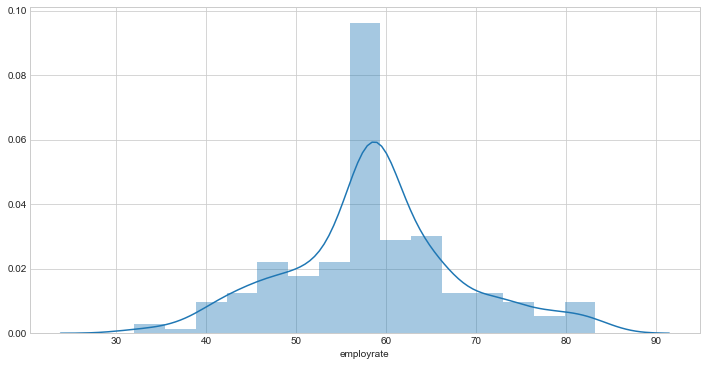

In [28]:
#Checking Distribution for all the dependent variable - Employment Rate 
##It looks normal _ Hence no need to take log
sns.distplot(GMM['employrate'])

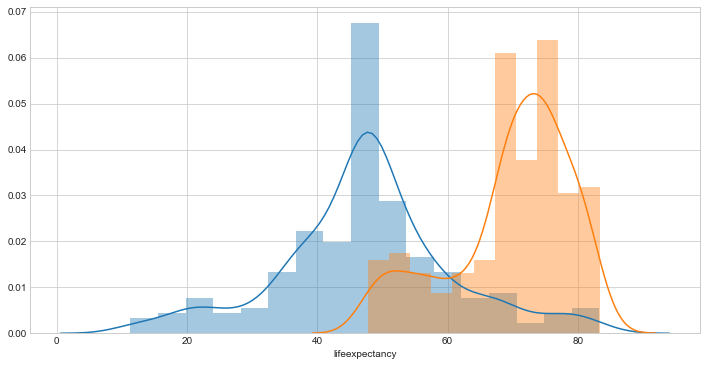

In [30]:
#Checking Distribution for some other variable -  
##It looks normal _ Hence no need to take log
sns.distplot(GMM['femaleemployrate'])
sns.distplot(GMM['lifeexpectancy']) 
#For Life Expectancy, it maybe a good idea to take log form. 

In [32]:
#transform predicted variable to be in logarithmic form
GMM['lnLE'] = np.log(GMM['lifeexpectancy'])

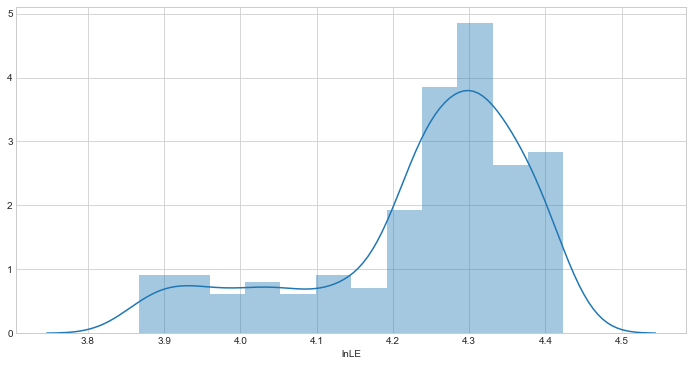

In [33]:
#CHECKING Distribution - It doesn't seem to be in symmetric -- Hence, we stick with its base form 
##We can take Log form or use other normality test- like Jarque Bera test...
        ##...but for a simplisity analysis; we are using it as linear/base form

sns.distplot(GMM['lnLE']) 

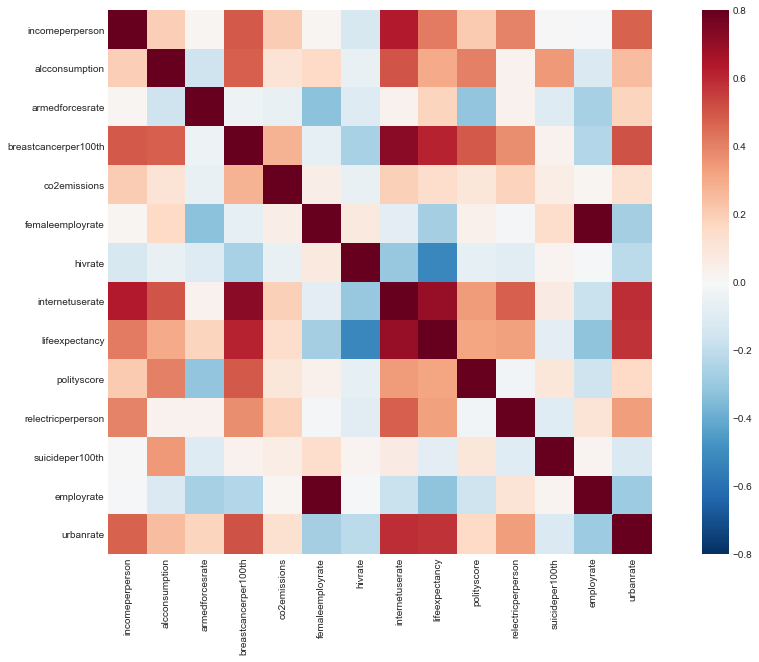

In [29]:
#correlation matrix for variables
corrmat = GMM.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

In [30]:
##We can see that the following variables are correlated:
#1. Employment Rate and Female Employment Rate are positive and very highly correlated. 
#2. Life Expectency and HIV are negative and highly correlated. 
## There are other variables as well which are related but not very high

####3. Internet Use Rate and Breast Cancer Per 100th are also medium correlated.

###We are excluding Female Employment Rate and HIV Feature from further processing as they are not only correlated with our...
    ###...variables of interest but also they are beyond the scope of our research questions

###Hence, we are only taking variables for further analysis and those are as follows:
    ## 1. Employment Rate (Dependent Variable)
    ## 2. Income per Person (Independent Variable)
    ## 3. Alcohol Consumption (Independent Variable)
    ## 4. CO2 Emmission (Independent Variable)
    ## 5. Life Expectancy (Independent Variable)
    ## 6. Political Score (Independent Variable)
    ## 7. Electricity Consumption in KWh (Independent Variable)
    ## 8. Urban Rate (Independent Variable)
    ## 9. Internet Usage Rate (Independent Variable)
    ## 10. Suicide Rate per 100th in 100,000 (Independent Variable)
    

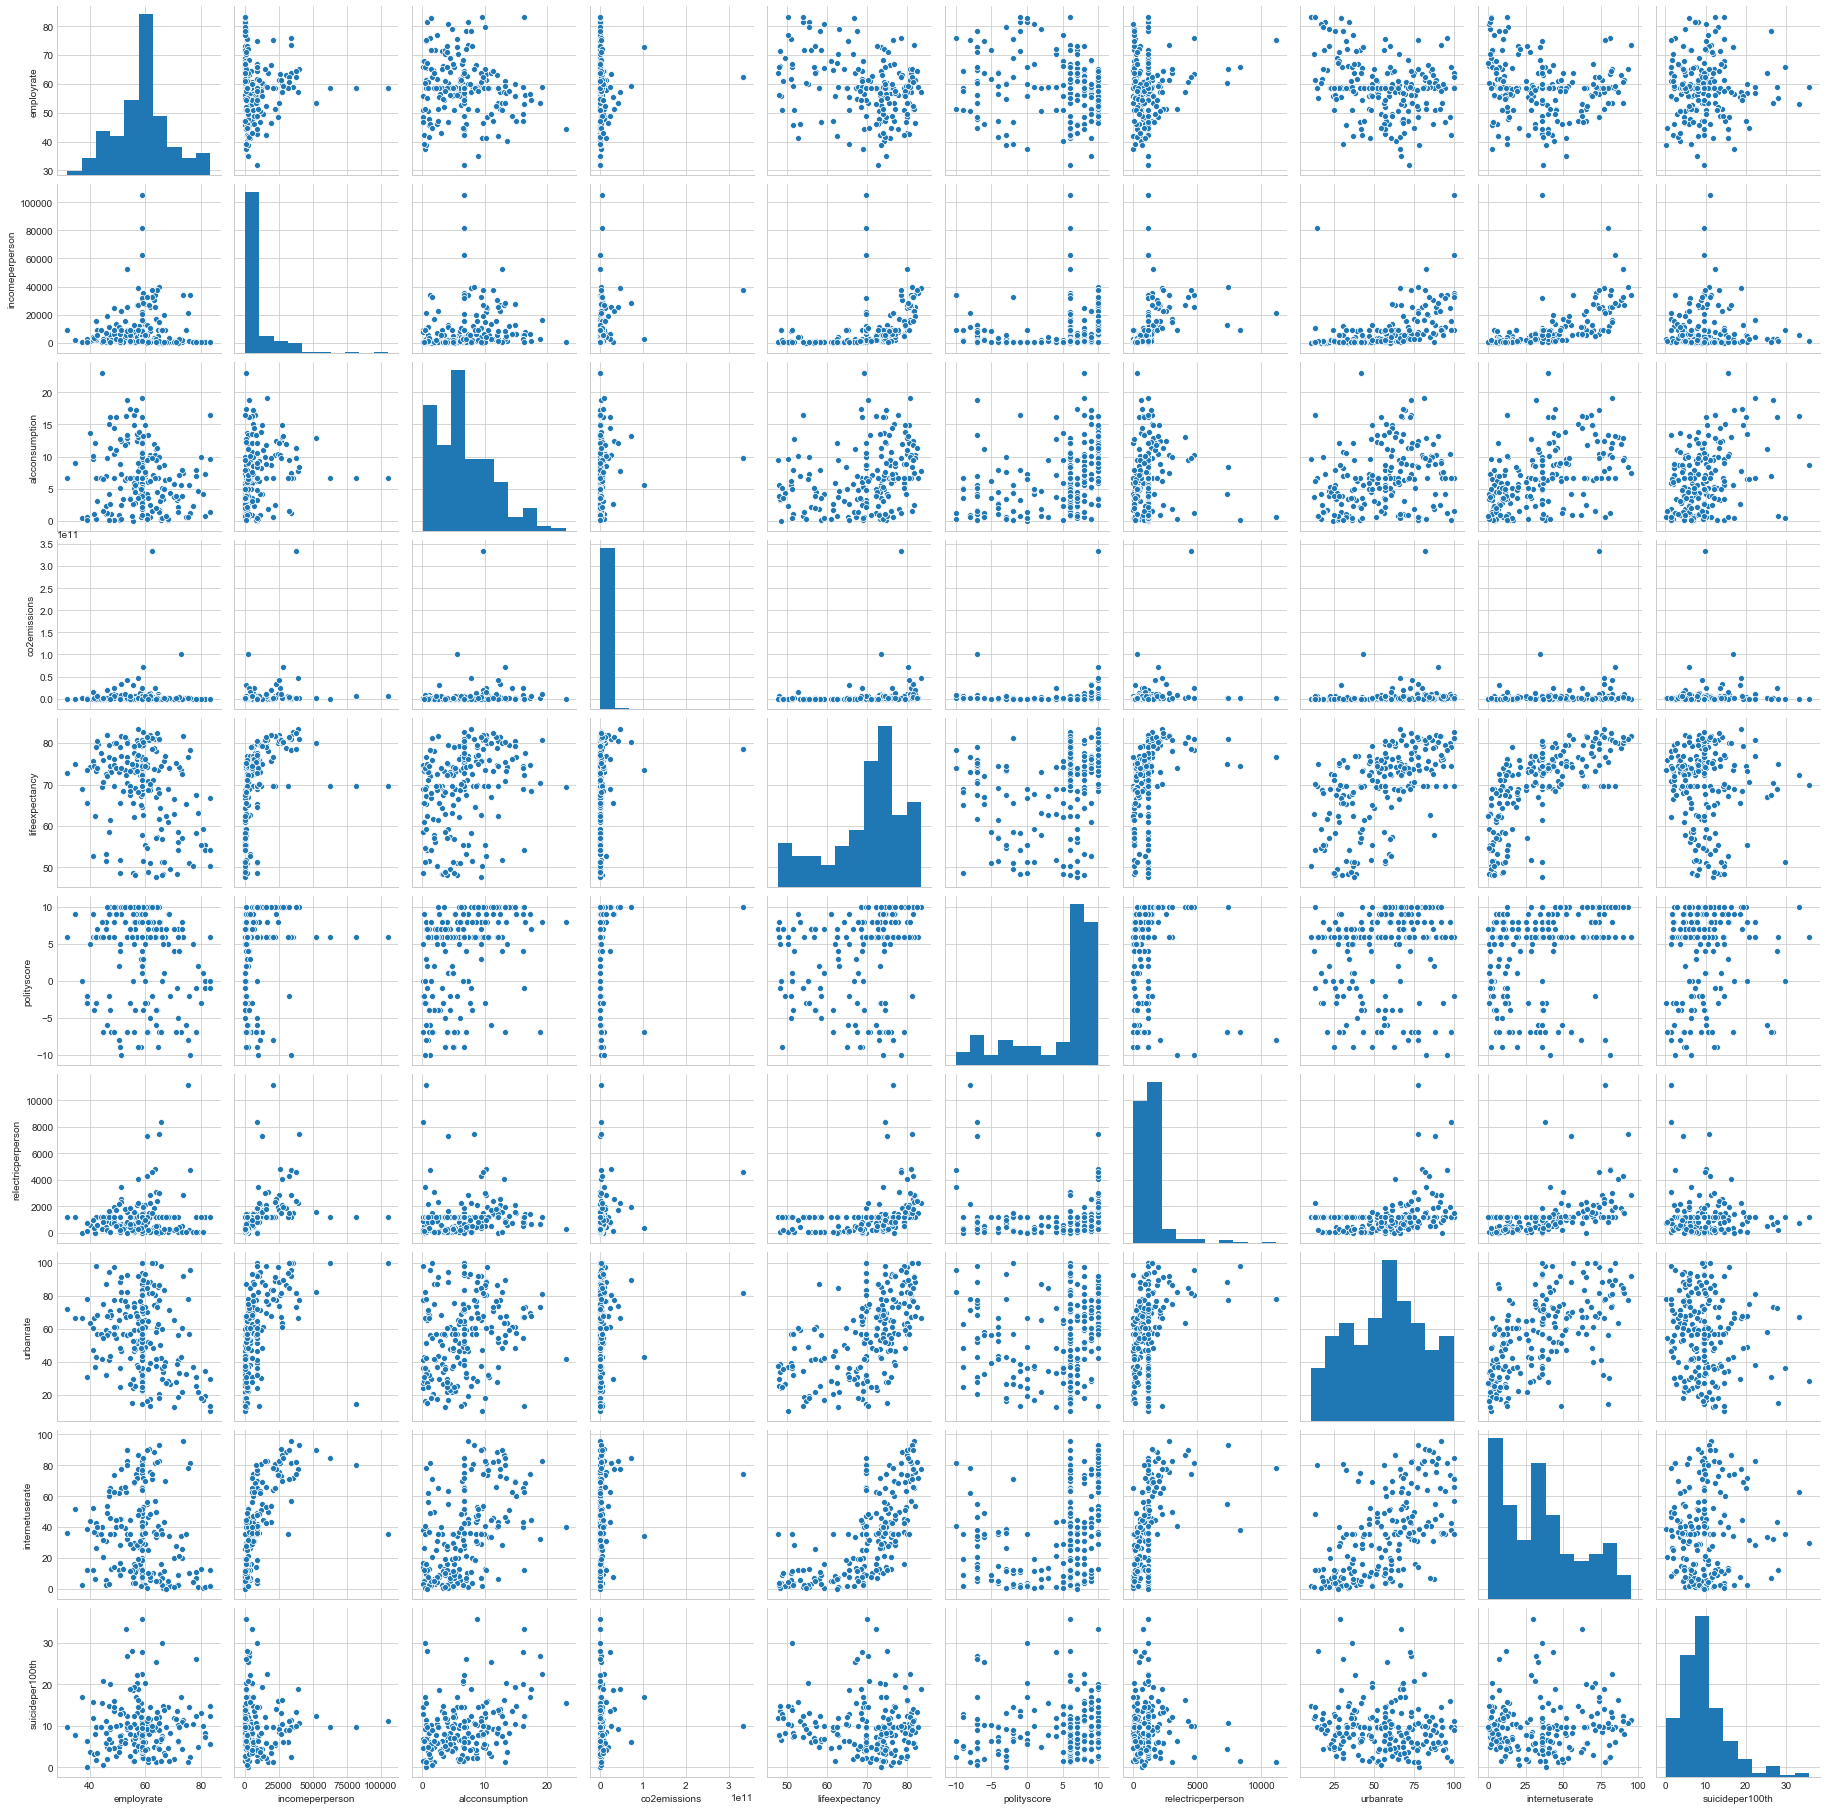

In [31]:
#scatter plots
cols = ['employrate', 'incomeperperson', 'alcconsumption', 'co2emissions','lifeexpectancy','polityscore','relectricperperson','urbanrate','internetuserate','suicideper100th']
sns.pairplot(GMM[cols], height = 2.5)
plt.show()

In [32]:
#check features correlated with Employment Rate
corrmat['employrate'].sort_values(ascending=False)[:15]

##We can see Female Employment Rate is highly correlated with Employment Rate hence, we have dropped it for our analysis.

employrate              1.000000
femaleemployrate        0.857500
relectricperperson      0.111720
suicideper100th         0.019985
co2emissions            0.017020
hivrate                -0.009475
incomeperperson        -0.010360
alcconsumption         -0.123301
polityscore            -0.166827
internetuserate        -0.175558
breastcancerper100th   -0.233237
armedforcesrate        -0.263904
urbanrate              -0.288330
lifeexpectancy         -0.320863
Name: employrate, dtype: float64

In [33]:
#check the correlated features 
corrval = corrmat.unstack()
corrval[(abs(corrval) > 0.6) & (abs(corrval) < 1)] 

incomeperperson       internetuserate         0.634687
breastcancerper100th  internetuserate         0.723400
                      lifeexpectancy          0.617807
femaleemployrate      employrate              0.857500
internetuserate       incomeperperson         0.634687
                      breastcancerper100th    0.723400
                      lifeexpectancy          0.694041
lifeexpectancy        breastcancerper100th    0.617807
                      internetuserate         0.694041
employrate            femaleemployrate        0.857500
dtype: float64

In [34]:
#LINEAR REGRESSION 
##Build a Linear Regression model and fit it using Normal Equations (OLS).

In [35]:
GMM.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,8740.966076,0.03,0.569653,26.80000,7.594400e+07,25.600000,1.935442,3.654122,48.673000,0.0,1173.178995,6.684385,55.700001,24.04
1,Albania,1914.996551,7.29,1.024736,57.40000,2.237473e+08,42.099998,1.935442,44.989947,76.918000,9.0,636.341383,7.699330,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.50000,2.932109e+09,31.700001,0.100000,12.500073,73.131000,2.0,590.509814,4.848770,50.500000,65.22
3,Andorra,21943.339900,10.17,1.444016,37.40289,5.033261e+09,47.549438,1.935442,81.000000,69.753524,6.0,1173.178995,5.362179,58.635955,88.92
4,Angola,1381.004268,5.57,1.461329,23.10000,2.483580e+08,69.400002,2.000000,9.999954,51.093000,-2.0,172.999227,14.554677,75.699997,56.70


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #initiate the model with default parameters
X = GMM.loc[:,['incomeperperson', 'alcconsumption', 'co2emissions','lifeexpectancy','polityscore','relectricperperson','urbanrate','internetuserate','suicideper100th']]
y = GMM.loc[:,'employrate'] 
lr.fit(X,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#get the list of LinearRegression parameters used to fit the model
lr.get_params() 

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [38]:
#Model intercept
lr.intercept_ 

82.85401486006383

In [39]:
#model coefficients
lr.coef_ 

array([ 1.17233772e-04,  8.27618624e-02,  9.61450575e-12, -2.91510295e-01,
       -1.12021940e-01,  1.70801676e-03, -1.07917273e-01, -1.74972876e-02,
       -2.99141823e-02])

In [40]:
#Better view of cooefficient
pd.Series(lr.coef_, index=X.columns) 

incomeperperson       1.172338e-04
alcconsumption        8.276186e-02
co2emissions          9.614506e-12
lifeexpectancy       -2.915103e-01
polityscore          -1.120219e-01
relectricperperson    1.708017e-03
urbanrate            -1.079173e-01
internetuserate      -1.749729e-02
suicideper100th      -2.991418e-02
dtype: float64

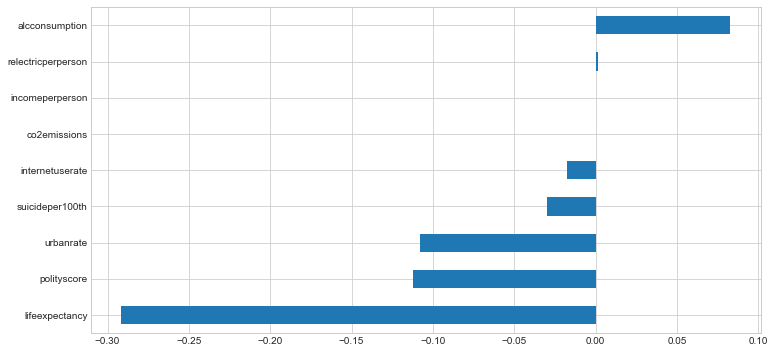

In [41]:
#Better way to understand the importance of each coefficient and its impact on Dependent Variable
pd.Series(lr.coef_,index=X.columns).sort_values().plot(kind = "barh")

In [42]:
#the coefficient of determination R^2 of the prediction (train set)
lr.score(X,y) 

0.20417156068792175

In [43]:
##To check model performance let's apply cross-validation. We use 5-fold cross-validation.

from sklearn.model_selection import cross_val_score
sk = cross_val_score(lr, X, y, cv=5) #default scoring from estimator is used, R^2
print("Mean score (LR): {:.2f}".format(np.mean(sk)))

Mean score (LR): 0.07


In [44]:
from sklearn.metrics import mean_squared_error, make_scorer
sk = cross_val_score(lr, X, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (LR): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (LR): 9.08


In [45]:
##RIDGE REGRESSION

from sklearn.linear_model import Ridge
r = Ridge(solver='lsqr') #regularized least squares iterative estimator
r.fit(X,y)
r.score(X,y)

0.0002896781552467198

In [46]:
r.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)>

In [47]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #zero-mean, unit variance normalization
X_scaled = std_scaler.fit_transform(X)

In [48]:
r.fit(X_scaled,y)
r.score(X_scaled,y)

0.2041546704229399

In [49]:
sk = cross_val_score(r, X_scaled, y, cv=5)
print("Mean score (Ridge, lsqr, alpha=1): {:.2f}".format(np.mean(sk)))

Mean score (Ridge, lsqr, alpha=1): 0.07


In [50]:
#rmse for the Ridge regression
sk = cross_val_score(r, X_scaled, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (Ridge, lsqr, alpha=1): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Ridge, lsqr, alpha=1): 9.06


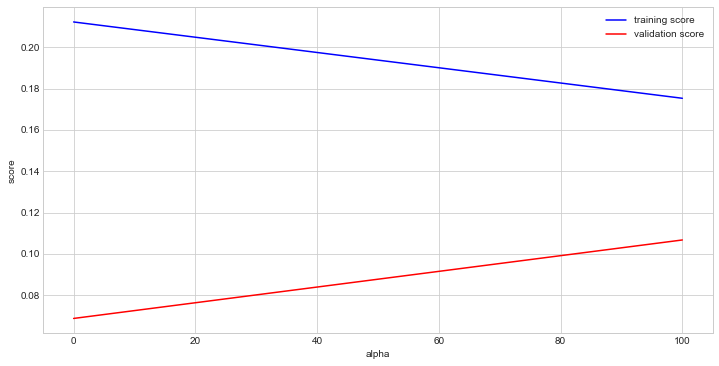

In [51]:
from sklearn.model_selection import validation_curve
alpha_vals = np.logspace(-7, 2, 3) #regularization parameter values range
train_scores, valid_scores = validation_curve(r, X_scaled, y,"alpha",alpha_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(alpha_vals, train_scores_mean, color='blue', label='training score')
plt.plot(alpha_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('score');

In [52]:
r = Ridge(solver='lsqr',alpha=100) #increase penalty on coefficients magnitude
r.fit(X_scaled,y)
sk = cross_val_score(r, X_scaled, y, cv=5)
print("Mean score (Ridge, lsqr, alpha=100): {:.2f}".format(np.mean(sk)))

Mean score (Ridge, lsqr, alpha=100): 0.11


In [53]:
sk = cross_val_score(r, X_scaled, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (Ridge, lsqr, alpha=100): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Ridge, lsqr, alpha=100): 8.90


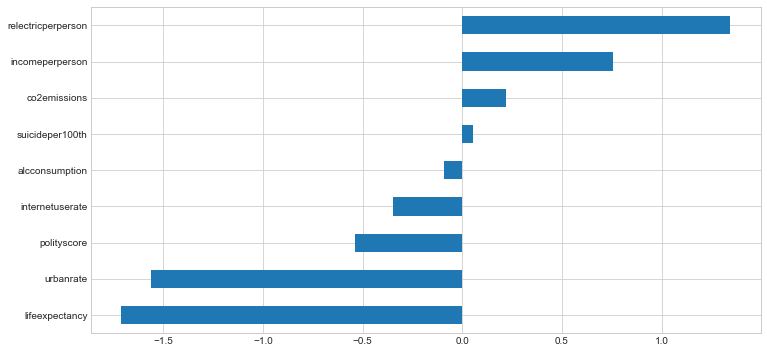

In [54]:
pd.Series(r.coef_,index=X.columns).sort_values().plot(kind = "barh")

In [55]:
from sklearn.preprocessing import PolynomialFeatures
#if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X) #transform X to higher order polynomials

In [56]:
X.shape,X_poly.shape

((213, 9), (213, 55))

In [57]:
lr.fit(X_poly,y)
sk = cross_val_score(lr, X_poly, y, cv=5)
print("Mean score (LR, poly): {:.2f}".format(np.mean(sk)))

Mean score (LR, poly): -185.38


In [58]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x7^2',
 'x7 x8',
 'x8^2']

In [59]:
np.array(X.columns)[:,np.newaxis]

array([['incomeperperson'],
       ['alcconsumption'],
       ['co2emissions'],
       ['lifeexpectancy'],
       ['polityscore'],
       ['relectricperperson'],
       ['urbanrate'],
       ['internetuserate'],
       ['suicideper100th']], dtype=object)

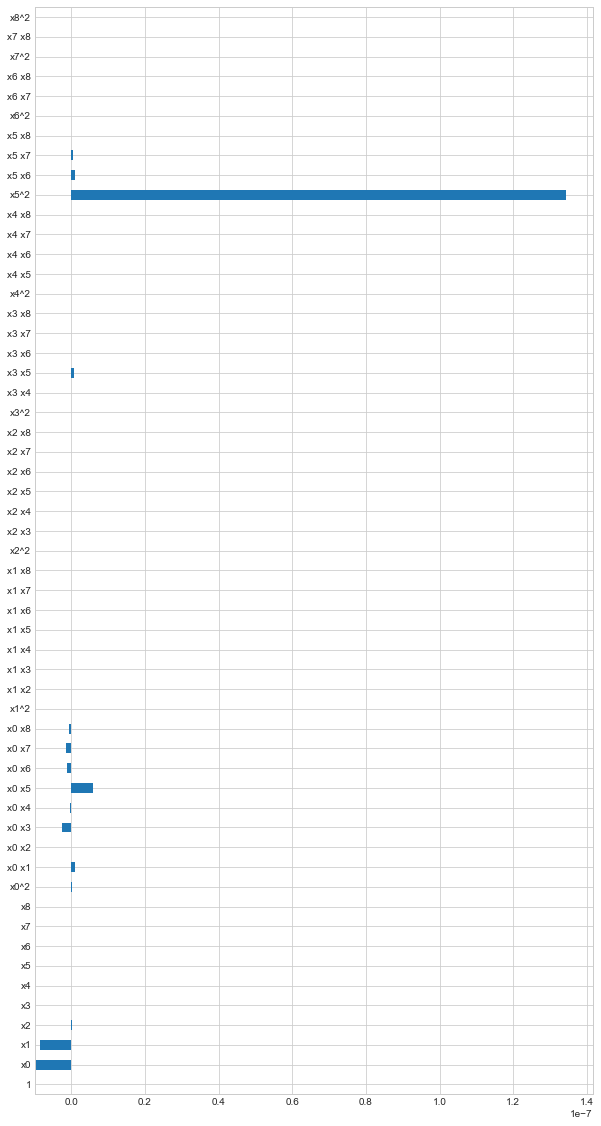

In [60]:
plt.figure(figsize=(10, 20))
pd.Series(lr.coef_,index=poly.get_feature_names()).plot(kind="barh")

In [61]:
sk = cross_val_score(lr, X_poly, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (LR, poly): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (LR, poly): 72.04


In [62]:
#apply standard scaler
X_scaled_poly = std_scaler.fit_transform(X_poly)

In [63]:
r = Ridge(solver='lsqr',alpha=100)
r.fit(X_scaled_poly,y)
r.score(X_scaled_poly,y)

0.2686627306206294

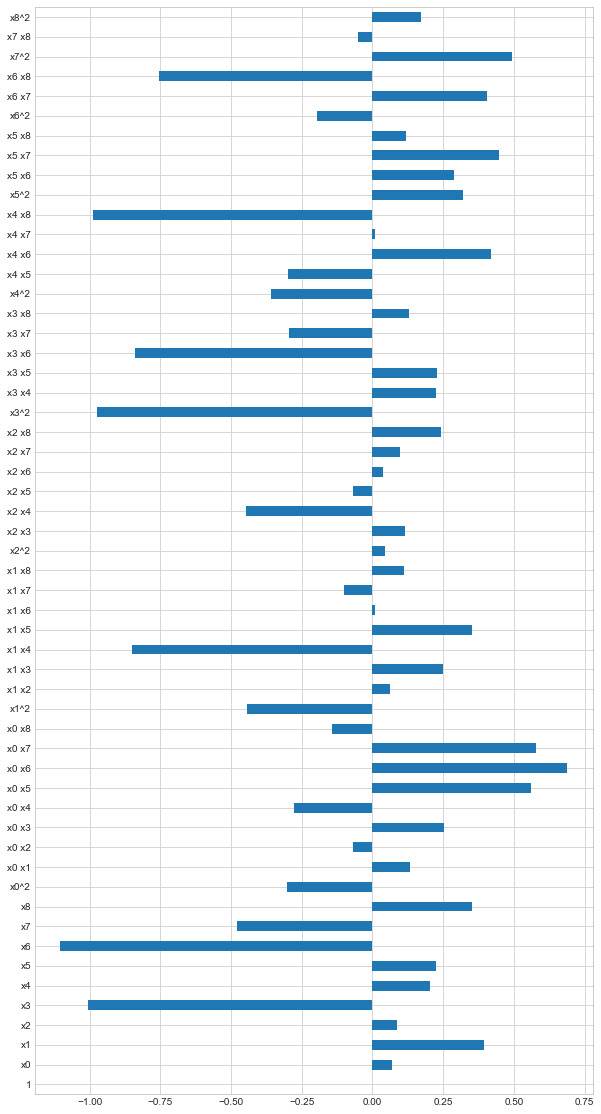

In [64]:
plt.figure(figsize=(10, 20))
pd.Series(r.coef_,index=poly.get_feature_names()).plot(kind="barh")

In [65]:
sk = cross_val_score(r, X_scaled_poly, y, cv=5)
print("Mean score (Ridge, lsqr, alpha=100, poly): {:.2f}".format(np.mean(sk)))

Mean score (Ridge, lsqr, alpha=100, poly): 0.16


In [66]:
sk = cross_val_score(r, X_scaled_poly, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))
print("Mean RMSE score (Ridge, lsqr, alpha=100, poly): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Ridge, lsqr, alpha=100, poly): 8.65


In [67]:
from sklearn.linear_model import Lasso
l = Lasso(alpha=0.1)
l.fit(X_scaled_poly,y)
l.score(X_scaled_poly,y)

0.3943733110267086

In [68]:
#number of features that Lasso got rid of are 28
np.sum(l.coef_==0) 

28

In [69]:
coef = pd.Series(l.coef_,index=poly.get_feature_names())
coef[coef>0]

x1       1.192977
x4       0.365847
x8       1.268881
x0 x5    1.454936
x0 x6    1.983641
x0 x7    0.279528
x1 x3    2.386671
x1 x8    0.791985
x2 x8    0.759582
x4 x6    3.048599
x5 x6    1.269542
x6^2     3.100425
x6 x7    0.807289
x7^2     3.967505
x7 x8    2.068504
dtype: float64

In [70]:
alpha_vals = np.logspace(-1, 1, 3) #regularization parameter values range
train_scores, valid_scores = validation_curve(l, X_scaled_poly, y,"alpha",alpha_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

C:\Users\Royalties\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.695688750174668, tolerance: 1.6986322330590258
  positive)


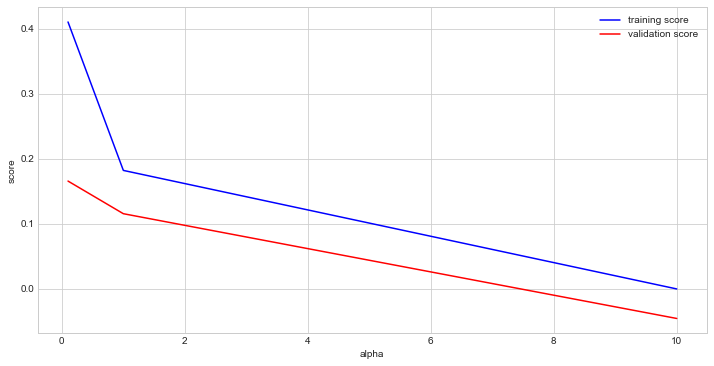

In [71]:
plt.plot(alpha_vals, train_scores_mean, color='blue', label='training score')
plt.plot(alpha_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('score');

In [72]:
sk = cross_val_score(l, X_scaled_poly, y, cv=5)

C:\Users\Royalties\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.695688750174668, tolerance: 1.6986322330590258
  positive)


In [73]:
print("Mean score (Lasso, alpha=0.1, poly): {:.2f}".format(np.mean(sk)))

Mean score (Lasso, alpha=0.1, poly): 0.17


In [74]:
sk = cross_val_score(l, X_scaled_poly, y, cv=5, scoring = make_scorer(mean_squared_error,greater_is_better=False))

C:\Users\Royalties\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.695688750174668, tolerance: 1.6986322330590258
  positive)


In [75]:
print("Mean RMSE score (Lasso, alpha=0.1, poly): {:.2f}".format(np.mean(np.sqrt(np.abs(sk)))))

Mean RMSE score (Lasso, alpha=0.1, poly): 8.60


In [76]:
#Models performance comparison on cross-validation sets ( 𝑅2  mean score; RMSE mean score):
#Mean score (LR): 0.07
#Mean RMSE score (LR): 9.08

#Mean score (Ridge, lsqr, alpha=1): 0.07
#Mean RMSE score (Ridge, lsqr, alpha=1): 9.08

#Mean score (Ridge, lsqr, alpha=100): 0.11
#Mean RMSE score (Ridge, lsqr, alpha=100): 8.90

#Polynomials
#Mean score (LR, poly): 72.04
#Mean RMSE score (LR, poly): 0.15
#Mean score (Ridge, lsqr, alpha=100, poly): 0.16
#Mean RMSE score (Ridge, lsqr, alpha=100, poly): 8.65
#Mean score (Lasso, alpha=0.1, poly): 0.17
#Mean RMSE score (Lasso, alpha=0.1, poly): 8.60

#So far, based on the cross-validation scoring, we may conclude that it is worth to stick to Linear Regression model with...
        ##...polynomials of degree 
    ##2. Ridge regression shows results close to Linear Regression, whereas LASSO regression makes more sense as it takes into ...
            #...not only the interaction terms of features but also the X1, X4, AND X8 ; which means according to LASSO ...
            #... Internet Usage, life expectancy and income per person are important explanatory variables.

##Note: These results perhaps can be improved by taking more observations into account for such dataset as it can make features...
            #...more normally distributed

##Please be informed that the model we build is one possible models from the datasets. We may make our analysis more... 
    #...more robust by playing with imputation strategy, increasing sample size to make distribution more normal... 
    #...change the dependency of variables and including many others like taking into account the heterogeniety of countries


In [77]:
##---THE END---

In [78]:
##CREATED BY SOMAN SAJID --  MMA 192 | PRACTICAL MACHINE LEARNING |TASK 02